# Crimes In India Capstone project Phase 3

### SQL operations

In [1]:
# importing libraries 
import sqlite3
import pandas as pd

In [2]:
# connecting to the sqlite database
conn = sqlite3.connect('crimes_in_india.db')

# Creating cursor object
cursor = conn.cursor()

### 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [3]:
# loading the dataframe
df=pd.read_csv("D:\\FlipRobo\\Capstone project\\India_Crime - Copy\\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [5]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [7]:
df.to_csv('crimes_against_women.csv', header=False, index=False)
df_without_header=pd.read_csv('crimes_against_women.csv', header=None)
df_without_header

,0,1,2,3,4,5,6,7,8,9
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


#### Create a Table 

In [6]:
cursor.execute("CREATE TABLE IF NOT EXISTS crimes_against_women (STATE_UT varchar(50), DISTRICT VARCHAR(50),Year int, Rape int, Kidnapping int, Dowry_Deaths int, Assault_on_women int, Insult_to_modesty int, Cruelty_by_Husband int, Importation_of_girls int)")

#### Inserting rows into the table 

In [8]:
with open('crimes_against_women.csv','r') as file:  # open csv file in read mode
    total_records=0
    for row in file:
        cursor.execute("INSERT INTO crimes_against_women VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(",")) 
        conn.commit()
        total_records+=1
print(total_records,'Records inserted')

9017 Records inserted


#### Checking inderted rows

In [9]:
x=cursor.execute('SELECT * FROM crimes_against_women')
for row in x:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 19, 31, 188, 59, 214, 0)
('AN

### SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [11]:
# to find the highest number of rapes happened in which state, district, and year
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year FROM crimes_against_women ORDER BY Rape DESC LIMIT 1")
query.fetchall()

[('MADHYA PRADESH', 'TOTAL', 2012)]

TOTAL is not a district name hence we need to delete those rows where district name is TOTAL

In [12]:
# delete those rows where district name is TOTAL
cursor.execute("DELETE FROM crimes_against_women WHERE DISTRICT='TOTAL'")
conn.commit()

In [13]:
# now finding the highest number of rape case in which state, district and year
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year FROM crimes_against_women ORDER BY Rape DESC LIMIT 1")
query.fetchall()

[('DELHI', 'DELHI UT TOTAL', 2012)]

DELHI UT TOTAL is also not a district name hence we need to delete that row also

In [14]:
cursor.execute("DELETE FROM crimes_against_women WHERE DISTRICT='DELHI UT TOTAL'")
conn.commit()

In [25]:
# now finding the highest number of rape case in which state, district and year
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year, Rape, Kidnapping FROM crimes_against_women ORDER BY Rape DESC LIMIT 1")
query.fetchall()

[('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)]

In [26]:
# to find the highest number of kidnapings in which state , district, and year
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year, Rape, Kidnapping FROM crimes_against_women ORDER BY Kidnapping DESC LIMIT 1")
query.fetchall()

[('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)]

In [27]:
# to find the highest number of rape and kidnappings in which state , district, and year
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year, Rape, Kidnapping FROM crimes_against_women ORDER BY Rape DESC, Kidnapping DESC LIMIT 1")
query.fetchall()

[('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)]

In [28]:
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year, Rape, Kidnapping FROM crimes_against_women ORDER BY Kidnapping DESC, Rape DESC LIMIT 1")
query.fetchall()

[('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)]

In [36]:
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year, Rape, Kidnapping FROM crimes_against_women WHERE Rape=(SELECT MAX(Rape) FROM crimes_against_women)")
query.fetchall()

[('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)]

## 3.3 SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [33]:
# to find the lowest number of Rape cases in which state, district, and year
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year ,Rape FROM crimes_against_women WHERE Rape=(SELECT MIN(Rape) FROM crimes_against_women)")
query.fetchall()

[('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0),
 ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0),
 ('ARUNACHAL PRADESH', 'KAMENG WEST', 2001, 0),
 ('ASSAM', 'C.I.D.', 2001, 0),
 ('BIHAR', 'ARWAL', 2001, 0),
 ('BIHAR', 'KATIHAR RLY.', 2001, 0),
 ('CHHATTISGARH', 'GRP RAIPUR', 2001, 0),
 ('HARYANA', 'GRP', 2001, 0),
 ('HIMACHAL PRADESH', 'G.R.P.', 2001, 0),
 ('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0),
 ('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0),
 ('JAMMU & KASHMIR', 'KARGIL', 2001, 0),
 ('JAMMU & KASHMIR', 'LEH', 2001, 0),
 ('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0),
 ('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0),
 ('MAHARASHTRA', 'PUNE RLY.', 2001, 0),
 ('MANIPUR', 'CHANDEL', 2001, 0),
 ('MANIPUR', 'SENAPATI', 2001, 0),
 ('MANIPUR', 'TAMENGLONG', 2001, 0),
 ('MANIPUR', 'UKHRUL', 2001, 0),
 ('MIZORAM', 'MAMIT', 2001, 0),
 ('NAGALAND', 'KIPHIRE', 2001, 0),
 ('NAGALAND', 'PEREN', 2001, 0),
 ('NAGALAND', 'TUENSANG', 2001, 0),
 ('PUNJAB', 'G.R.P', 2001, 0),
 ('SIKKIM', 'NORTH', 2001, 0),
 

In [34]:
# To find the lowest number of Kidnapping cases in which state, district and year
query=cursor.execute("SELECT STATE_UT, DISTRICT, Year FROM crimes_against_women WHERE Kidnapping=(SELECT MIN(Kidnapping) FROM crimes_against_women)")
query.fetchall()

[('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001),
 ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001),
 ('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2001),
 ('ARUNACHAL PRADESH', 'TAWANG', 2001),
 ('ASSAM', 'C.I.D.', 2001),
 ('ASSAM', 'G.R.P.', 2001),
 ('ASSAM', 'R.P.O.', 2001),
 ('BIHAR', 'ARWAL', 2001),
 ('BIHAR', 'JAMALPUR RLY.', 2001),
 ('CHHATTISGARH', 'BIZAPUR', 2001),
 ('CHHATTISGARH', 'GRP RAIPUR', 2001),
 ('CHHATTISGARH', 'KAWARDHA', 2001),
 ('GUJARAT', 'W.RLY', 2001),
 ('HIMACHAL PRADESH', 'G.R.P.', 2001),
 ('JAMMU & KASHMIR', 'CRIME JAMMU', 2001),
 ('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001),
 ('JAMMU & KASHMIR', 'RAILWAYS', 2001),
 ('JHARKHAND', 'DEOGHAR', 2001),
 ('JHARKHAND', 'DHANBAD RLY.', 2001),
 ('JHARKHAND', 'DUMKA', 2001),
 ('JHARKHAND', 'JAMSHEDPUR RLY.', 2001),
 ('JHARKHAND', 'PAKUR', 2001),
 ('KARNATAKA', 'CHITRADURGA', 2001),
 ('KARNATAKA', 'HASSAN', 2001),
 ('KARNATAKA', 'RAILWAYS', 2001),
 ('KARNATAKA', 'UDUPI', 2001),
 ('KERALA', 'CBCID', 2001),
 ('KERALA', 'IDUKKI', 2001),
 (

In [37]:
# to find least number of Rape and Kidnapping happened in which state, district and year
query=cursor.execute('SELECT STATE_UT, DISTRICT, Year FROM crimes_against_women WHERE Rape=(SELECT MIN(Rape) FROM crimes_against_women) AND Kidnapping=(SELECT MIN(Kidnapping) FROM crimes_against_women)')
query.fetchall()

[('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001),
 ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001),
 ('ASSAM', 'C.I.D.', 2001),
 ('BIHAR', 'ARWAL', 2001),
 ('CHHATTISGARH', 'GRP RAIPUR', 2001),
 ('HIMACHAL PRADESH', 'G.R.P.', 2001),
 ('JAMMU & KASHMIR', 'CRIME JAMMU', 2001),
 ('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001),
 ('JAMMU & KASHMIR', 'RAILWAYS', 2001),
 ('MADHYA PRADESH', 'JABALPUR RLY.', 2001),
 ('MAHARASHTRA', 'PUNE RLY.', 2001),
 ('MANIPUR', 'SENAPATI', 2001),
 ('MANIPUR', 'TAMENGLONG', 2001),
 ('MIZORAM', 'MAMIT', 2001),
 ('NAGALAND', 'KIPHIRE', 2001),
 ('NAGALAND', 'PEREN', 2001),
 ('NAGALAND', 'TUENSANG', 2001),
 ('PUNJAB', 'G.R.P', 2001),
 ('SIKKIM', 'NORTH', 2001),
 ('TAMIL NADU', 'CHENNAI RLY.', 2001),
 ('TAMIL NADU', 'TRICHY RLY.', 2001),
 ('WEST BENGAL', 'ASANSOL', 2001),
 ('WEST BENGAL', 'SILIGURI G.R.P.', 2001),
 ('A & N ISLANDS', 'NICOBAR', 2001),
 ('DAMAN & DIU', 'DIU', 2001),
 ('DELHI', 'S.T.F.', 2001),
 ('LAKSHADWEEP', 'LAKSHADWEEP', 2001),
 ('ANDHRA PRADESH', 'SECUNDER

### 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [38]:
# Loading the dataset 
df=pd.read_csv("D:\\FlipRobo\\Capstone project\\India_Crime - Copy\\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [39]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [40]:
# Saving dataset
df.to_csv("crimes_against_SC.csv", header=None, index=None)

In [41]:
# Loading dataset
df_without_header=pd.read_csv("crimes_against_SC.csv", header=None)
df_without_header

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [42]:
# Creating table in to the crimes in india database
cursor.execute("CREATE TABLE IF NOT EXISTS crimes_against_SC (STATE_UT VARCHAR(50), DISTRICT VARCHAR(50), Year INT, Murder INT, Rape INT, Kidnapping INT, Dacoity INT, Robbery INT, Arson INT, Hurt INT, POA_ACT INT, PCR_ACT INT, Others_Crimes INT)")
conn.commit()

In [43]:
# Inserting values into the table crimes_against_SC 
with open('crimes_against_SC.csv', "r") as file:
    total_records=0
    for row in file:
        cursor.execute("INSERT INTO crimes_against_SC VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)", row.split(','))
        conn.commit()
        total_records +=1
print("Total Record inderted = ", total_records)

Total Record inderted =  9018


In [44]:
query= cursor.execute("SELECT * FROM crimes_against_SC")
query.fetchall()

[('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 4, 0, 0, 0, 3, 0, 15, 32),
 ('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 4, 0, 0, 0, 0, 49, 21, 0, 53),
 ('ANDHRA PRADESH', 'CHITTOOR', 2001, 3, 3, 0, 0, 0, 0, 38, 36, 0, 34),
 ('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 3, 0, 0, 0, 0, 20, 52, 0, 25),
 ('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 1, 3, 0, 0, 0, 0, 3, 12, 63, 7),
 ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 ('ANDHRA PRADESH', 'GUNTUR', 2001, 4, 5, 1, 0, 0, 3, 53, 16, 6, 53),
 ('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 2, 1, 0, 0, 0, 0, 40, 1, 35),
 ('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 8, 1, 3, 3, 1, 0, 52, 72, 6, 10),
 ('ANDHRA PRADESH', 'KHAMMAM', 2001, 2, 6, 0, 0, 0, 0, 12, 51, 0, 90),
 ('ANDHRA PRADESH', 'KRISHNA', 2001, 1, 2, 4, 0, 0, 0, 13, 98, 79, 82),
 ('ANDHRA PRADESH', 'KURNOOL', 2001, 4, 5, 0, 0, 0, 0, 42, 119, 0, 32),
 ('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 10, 8, 0, 0, 0, 0, 9, 79, 25, 90),
 ('ANDHRA PRADESH', 'MEDAK', 2001, 4, 2, 0, 0, 0

In [45]:
# delete those rows which has district name as TOTAL
cursor.execute('DELETE FROM crimes_against_SC WHERE DISTRICT="TOTAL"')


In [46]:
conn.commit()

### 3.5 SQL query to find the highest number of dacoity/robbery in which district.

In [55]:
# to find the highest number of dacoity 
query=cursor.execute("SELECT DISTRICT FROM crimes_against_SC WHERE  Dacoity=(SELECT MAX(Dacoity) FROM crimes_against_SC)")
query.fetchall()

[('DAHOD',)]

In [57]:
# To find the highest number of robbery
query= cursor.execute("SELECT DISTRICT FROM crimes_against_SC WHERE Robbery=(SELECT MAX(Robbery) FROM crimes_against_SC)")
query.fetchall()

[('VIJAYAWADA',)]

In [58]:
# to find the highest number of DACOITY OR ROBBERY 
query=cursor.execute("SELECT DISTRICT FROM crimes_against_SC WHERE  Dacoity=(SELECT MAX(Dacoity) FROM crimes_against_SC) OR Robbery=(SELECT MAX(Robbery) FROM crimes_against_SC)")
query.fetchall()

[('DAHOD',), ('VIJAYAWADA',)]

### 3.6 SQL query to find in which districts(All) the lowest number of murders happened

In [60]:
query=cursor.execute("SELECT DISTRICT FROM crimes_against_SC WHERE Murder=(SELECT MIN(Murder) FROM crimes_against_SC)")
query.fetchall()

[('ADILABAD',),
 ('ANANTAPUR',),
 ('CUDDAPAH',),
 ('GUNTAKAL RLY.',),
 ('HYDERABAD CITY',),
 ('NELLORE',),
 ('NIZAMABAD',),
 ('SECUNDERABAD RLY.',),
 ('VIJAYAWADA RLY.',),
 ('VISAKHA RURAL',),
 ('VISAKHAPATNAM',),
 ('WARANGAL',),
 ('WEST GODAVARI',),
 ('CHANGLANG',),
 ('DIBANG VALLEY',),
 ('KAMENG EAST',),
 ('KAMENG WEST',),
 ('LOHIT',),
 ('PAPUM PARE',),
 ('SIANG EAST',),
 ('SIANG UPPER',),
 ('SIANG WEST',),
 ('SUBANSIRI LOWER',),
 ('SUBANSIRI UPPER',),
 ('TAWANG',),
 ('TIRAP',),
 ('BARPETA',),
 ('BONGAIGAON',),
 ('C.I.D.',),
 ('CACHAR',),
 ('DARRANG',),
 ('DHEMAJI',),
 ('DHUBRI',),
 ('DIBRUGARH',),
 ('G.R.P.',),
 ('GOALPARA',),
 ('GOLAGHAT',),
 ('GUWAHATI CITY',),
 ('HAILAKANDI',),
 ('JORHAT',),
 ('KAMRUP',),
 ('KARBI ANGLONG',),
 ('KARIMGANJ',),
 ('KOKRAJHAR',),
 ('LAKHIMPUR',),
 ('MORIGAON',),
 ('N.C. HILLS',),
 ('NAGAON',),
 ('NALBARI',),
 ('R.P.O.',),
 ('SIBSAGAR',),
 ('SONITPUR',),
 ('TINSUKIA',),
 ('ARWAL',),
 ('BAGAHA',),
 ('BANKA',),
 ('BEGUSARAI',),
 ('BHOJPUR',),
 ('BUXAR',

### 3.7 SQL query to find the number of murders in ascending order in district and yearwise.

In [67]:
query=cursor.execute("SELECT DISTRICT, Year, Murder FROM crimes_against_SC ORDER BY Murder, DISTRICT, Year ASC")
for i in query:
    print(i)

('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS NORTH', 2002, 0)
('24 PARGANAS NORTH', 2003, 0)
('24 PARGANAS NORTH', 2004, 0)
('24 PARGANAS NORTH', 2005, 0)
('24 PARGANAS NORTH', 2006, 0)
('24 PARGANAS NORTH', 2007, 0)
('24 PARGANAS NORTH', 2008, 0)
('24 PARGANAS NORTH', 2009, 0)
('24 PARGANAS NORTH', 2010, 0)
('24 PARGANAS NORTH', 2011, 0)
('24 PARGANAS NORTH', 2012, 0)
('24 PARGANAS SOUTH', 2001, 0)
('24 PARGANAS SOUTH', 2002, 0)
('24 PARGANAS SOUTH', 2003, 0)
('24 PARGANAS SOUTH', 2004, 0)
('24 PARGANAS SOUTH', 2005, 0)
('24 PARGANAS SOUTH', 2006, 0)
('24 PARGANAS SOUTH', 2007, 0)
('24 PARGANAS SOUTH', 2008, 0)
('24 PARGANAS SOUTH', 2009, 0)
('24 PARGANAS SOUTH', 2010, 0)
('24 PARGANAS SOUTH', 2011, 0)
('24 PARGANAS SOUTH', 2012, 0)
('A and N ISLANDS', 2007, 0)
('ADILABAD', 2001, 0)
('ADILABAD', 2002, 0)
('ADILABAD', 2003, 0)
('ADILABAD', 2004, 0)
('ADILABAD', 2005, 0)
('ADILABAD', 2010, 0)
('ADILABAD', 2011, 0)
('AHMEDABAD RURAL', 2001, 0)
('AHMEDABAD RURAL', 2004, 0)
('AHMEDABAD RUR

### 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [71]:
# Loading the entire dataset
df=pd.read_csv("D:\\FlipRobo\\Capstone project\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [72]:
# Column names of the dataset
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [73]:
# creating a anather dataset of required column
df2=df[['STATE/UT','DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE']]
df2

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23
...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,6
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,7


In [74]:
# saving the dataset into a csv file not taking column names and index number
df2.to_csv("crime_ipc.csv", header=False, index=None)

In [75]:
# looking the saved dataset
df=pd.read_csv("crime_ipc.csv", header=None)
df

,0,1,2,3,4,5
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23
...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,6
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,7


In [76]:
# now creating a table into the crimes_in_india database
cursor.execute("CREATE TABLE IF NOT EXISTS crimes_ipc (STATE_UT VARCHAR(50), DISTRICT VARCHAR(50), YEAR YEAR, MURDER INT, ATTEMPT_TO_MURDER INT, RAPE INT)")
conn.commit()

In [79]:
# inserting the data of crime_ipc.csv file into the table crimes_ipc 
with open("crime_ipc.csv", 'r') as file:  # opening file in read mode
    total_records=0
    for row in file:
        cursor.execute("INSERT INTO crimes_ipc VALUES(?,?,?,?,?,?)", row.split(','))
        conn.commit()
        total_records+=1
print("Total Records inserted =", total_records)

Total Records inserted = 9017


So finally all rows has been inserted of required column.

In [90]:
cursor.execute("DELETE FROM crimes_ipc WHERE DISTRICT = 'TOTAL' OR DISTRICT='DELHI UT TOTAL'")
conn.commit()

### 3.8.2 SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [96]:
query=cursor.execute("SELECT STATE_UT, DISTRICT, YEAR, MURDER FROM crimes_ipc GROUP BY STATE_UT, DISTRICT, YEAR ORDER BY MURDER DESC")
query.fetchall()

[('BIHAR', 'PATNA', 2004, 542),
 ('BIHAR', 'PATNA', 2003, 484),
 ('BIHAR', 'PATNA', 2002, 472),
 ('BIHAR', 'PATNA', 2005, 436),
 ('BIHAR', 'PATNA', 2001, 434),
 ('BIHAR', 'PATNA', 2012, 356),
 ('BIHAR', 'PATNA', 2008, 341),
 ('BIHAR', 'PATNA', 2006, 338),
 ('UTTAR PRADESH', 'MUZAFFARNAGAR', 2001, 324),
 ('BIHAR', 'PATNA', 2007, 317),
 ('BIHAR', 'PATNA', 2009, 314),
 ('BIHAR', 'PATNA', 2010, 304),
 ('MAHARASHTRA', 'MUMBAI', 2001, 295),
 ('UTTAR PRADESH', 'MUZAFFARNAGAR', 2002, 287),
 ('UTTAR PRADESH', 'MEERUT', 2001, 275),
 ('UTTAR PRADESH', 'BAREILLY', 2001, 272),
 ('JHARKHAND', 'RANCHI', 2002, 270),
 ('JHARKHAND', 'RANCHI', 2004, 270),
 ('WEST BENGAL', 'PASCHIM MIDNAPUR', 2010, 268),
 ('KARNATAKA', 'BANGALORE COMMR.', 2010, 266),
 ('KARNATAKA', 'BANGALORE COMMR.', 2012, 266),
 ('WEST BENGAL', '24 PARGANAS SOUTH', 2010, 263),
 ('KARNATAKA', 'BANGALORE COMMR.', 2009, 256),
 ('UTTAR PRADESH', 'GHAZIABAD', 2009, 254),
 ('JHARKHAND', 'RANCHI', 2006, 253),
 ('KARNATAKA', 'BANGALORE COMMR.',

In [101]:

# the SQL query
sql_query = """
WITH RankedMurders AS (
  SELECT
    STATE_UT,
    DISTRICT,
    YEAR,
    MURDER,
    ROW_NUMBER() OVER (PARTITION BY STATE_UT, YEAR ORDER BY MURDER DESC) AS rn
  FROM
    crimes_ipc
)

SELECT
  STATE_UT,
  YEAR,
  DISTRICT,
  MURDER
FROM
  RankedMurders
WHERE
  rn = 1;
"""

# Execute the query
results=cursor.execute(sql_query)

# Fetch the results
results.fetchall()


[('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2005, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2006, 'ANDAMAN', 3),
 ('A & N ISLANDS', 2007, 'A and N ISLANDS', 15),
 ('A & N ISLANDS', 2008, 'ANDAMAN', 8),
 ('A & N ISLANDS', 2009, 'ANDAMAN', 15),
 ('A & N ISLANDS', 2010, 'ANDAMAN', 8),
 ('A & N ISLANDS', 2011, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2012, 'SOUTH', 8),
 ('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214),
 ('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214),
 ('ANDHRA PRADESH', 2003, 'GUNTUR', 210),
 ('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183),
 ('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212),
 ('ANDHRA PRADESH', 2006, 'CYBERABAD', 193),
 ('ANDHRA PRADESH', 2007, 'CYBERABAD', 186),
 ('ANDHRA PRADESH', 2008, 'CYBERABAD', 197),
 ('ANDHRA PRADESH', 2009, 'CYBERABAD', 186),
 ('ANDHRA PRADESH', 2010, 'CYBERABAD', 187),
 ('ANDHRA PRADESH', 2011, 'CYBERABAD', 213),
 (

### 3.8.3 Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [102]:
# Execute the query and store the result in a DataFrame
df = pd.read_sql_query(sql_query, conn)
df

,STATE_UT,YEAR,DISTRICT,MURDER
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
417,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [105]:
# Analyze districts that appear 3 or more than 3 years
district_counts = df['DISTRICT'].value_counts()
districts_to_analyze = district_counts[district_counts >= 3].index # return the index number of the dataset

# Filter the DataFrame for the selected districts
filtered_df = df[df['DISTRICT'].isin(districts_to_analyze)]

# Sort the DataFrame by state/ut, district, murders, and year in descending order
sorted_df = filtered_df.sort_values(by=['STATE_UT', 'DISTRICT', 'MURDER', 'YEAR'], ascending=[False, False, False, False], ignore_index=True)

# Display the results
sorted_df

,STATE_UT,YEAR,DISTRICT,MURDER
0,WEST BENGAL,2011,24 PARGANAS SOUTH,247
1,WEST BENGAL,2008,24 PARGANAS SOUTH,239
2,WEST BENGAL,2012,24 PARGANAS SOUTH,224
3,WEST BENGAL,2009,24 PARGANAS NORTH,229
4,WEST BENGAL,2002,24 PARGANAS NORTH,204
...,...,...,...,...
355,A & N ISLANDS,2004,ANDAMAN,13
356,A & N ISLANDS,2001,ANDAMAN,13
357,A & N ISLANDS,2010,ANDAMAN,8
358,A & N ISLANDS,2008,ANDAMAN,8


### 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

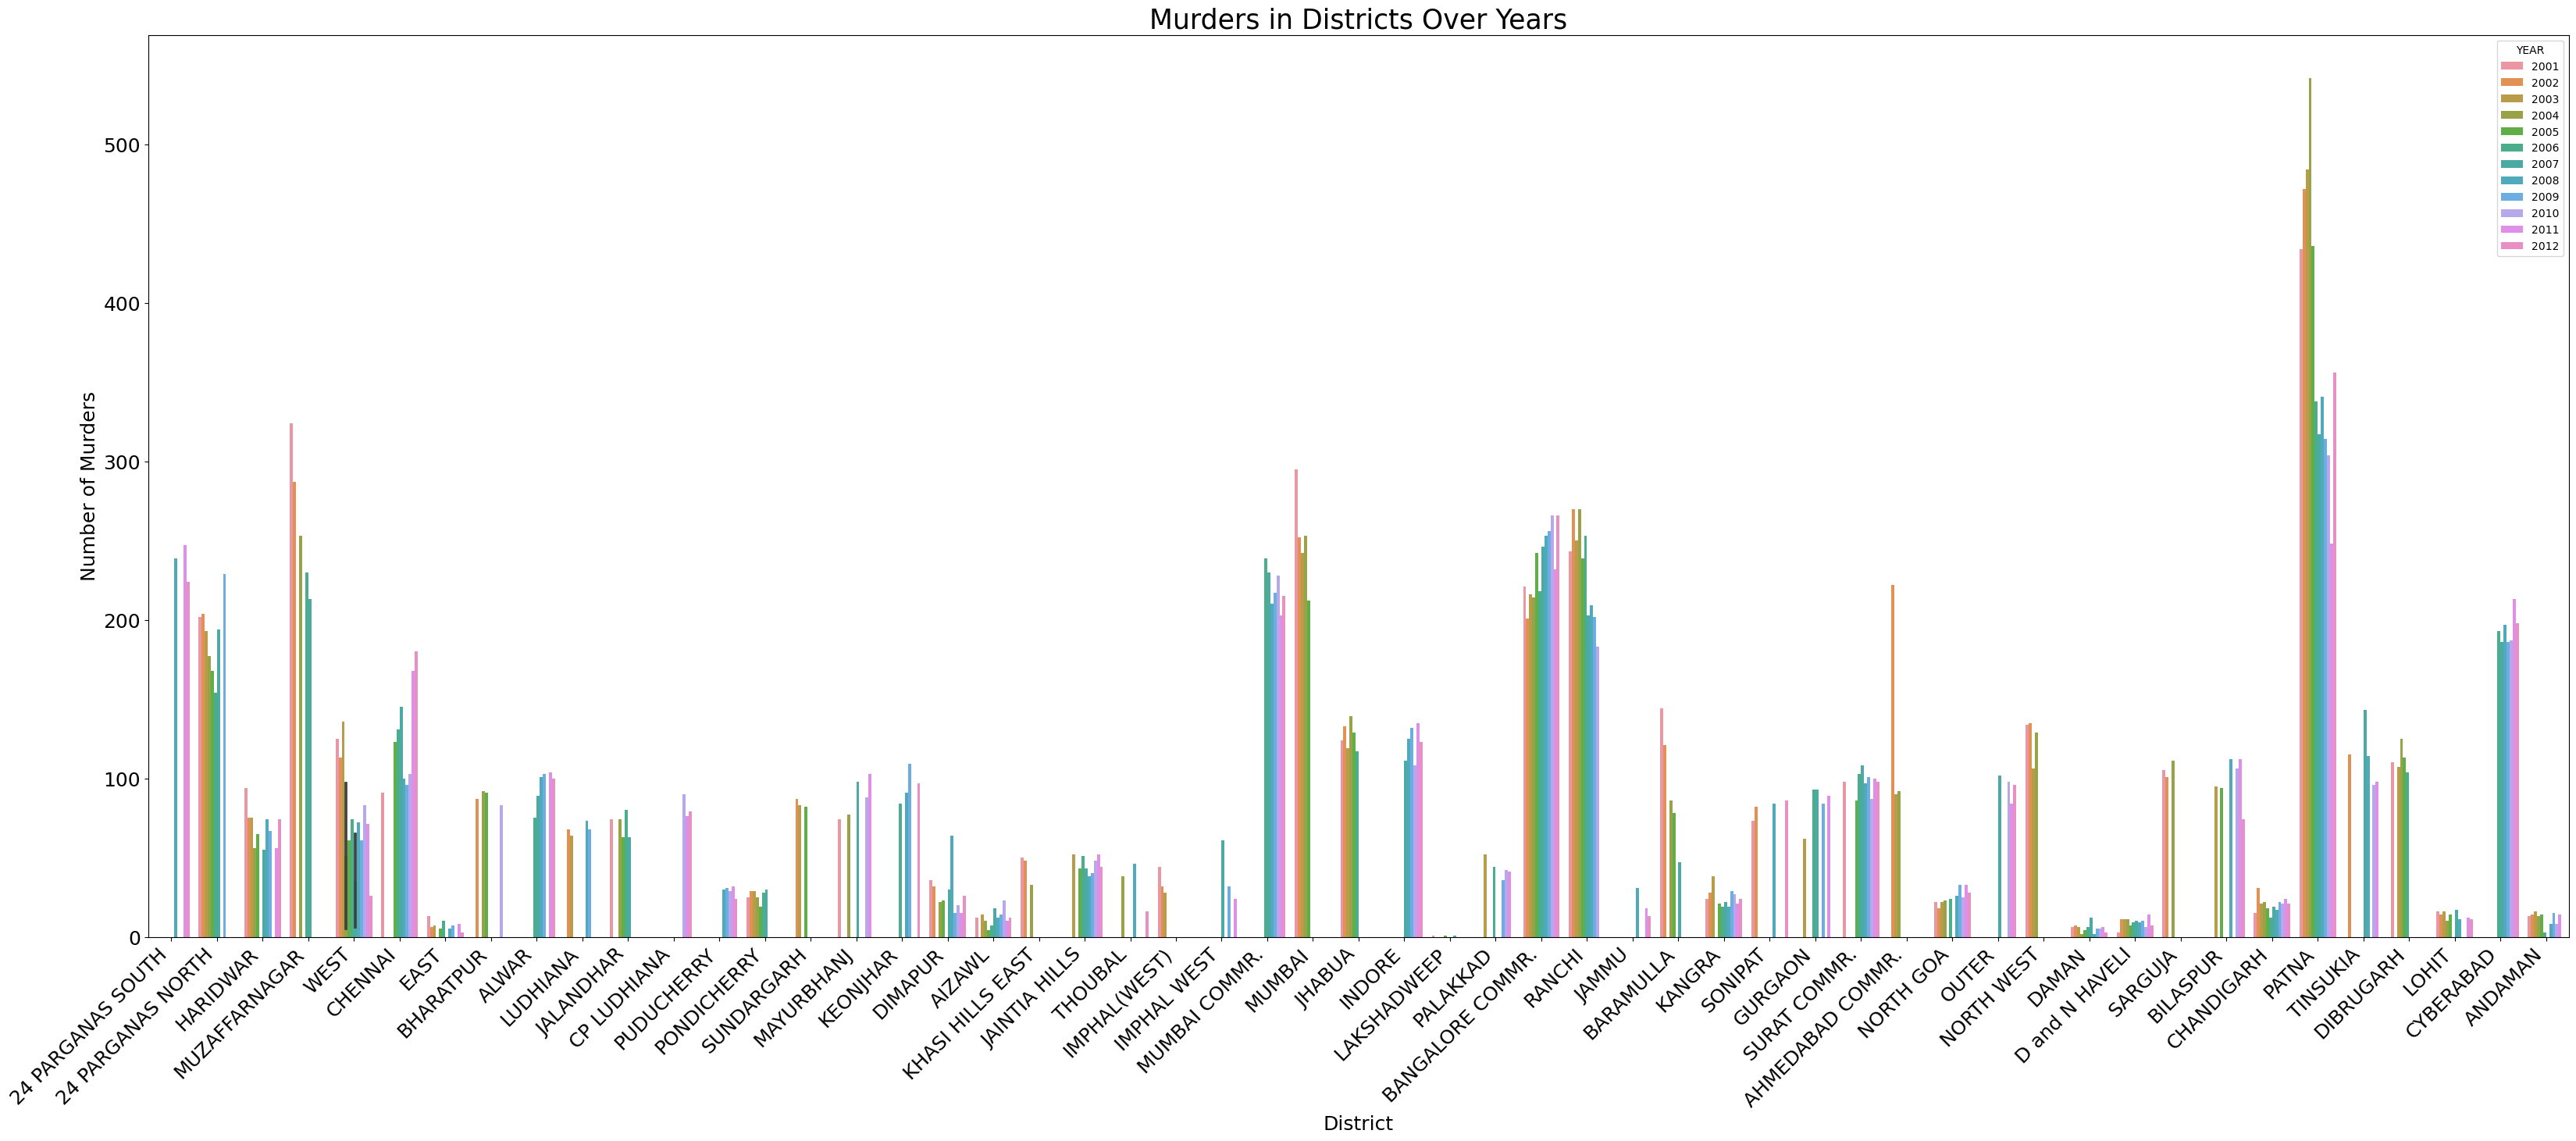

In [112]:
# Bar Plot
plt.figure(figsize=(40,15))
sns.barplot(x='DISTRICT', y='MURDER', hue='YEAR', data=sorted_df)
plt.title('Murders in Districts Over Years', fontsize=25)
plt.xlabel('District', fontsize=18)
plt.ylabel('Number of Murders', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.show()